# Import Libraries

In [22]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import statsmodels.api as sm
#import mplcursors
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

plt.style.use('seaborn-darkgrid')

# Load the Dataset

In [23]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [24]:
df = pd.read_csv('C:\\NachuMohan\\Saint_Peters_University\\GA_Summer2020\\Health-Literacy-COVID19\\Census Demographic Data\\Clean Data\\COVIDdemographic.csv')

In [25]:
df.head(5)

,State,cases,deaths,Total Population,Total population_Male,Total population_Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,RACE_Total population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Total population_HISPANIC OR LATINO
0,Alabama,387786,14345,4887871,2369271,2518600,288589,290369,321430,332209,317810,635976,593480,626173,332700,319472,493396,251025,85242,4887871,3306838,1307040,22063,65095,1797,4887871
1,Alaska,18316,367,737438,382952,354486,52173,52544,49747,48514,49107,117688,97020,89333,47300,46012,59630,21000,7370,737438,474555,25197,111371,46381,7958,737438
2,Arizona,426614,18857,7171646,3565129,3606517,434032,441613,488738,477306,489653,979328,882618,852462,430467,436326,727956,398408,132739,7171646,5590505,336340,330599,237873,15661,7171646
3,Arkansas,161569,3301,3013825,1476680,1537145,188092,192523,203502,208021,199748,392937,367053,370343,196034,187896,296808,154699,56169,3013825,2306096,456714,20951,47548,9398,3013825
4,California,2664110,102387,39557045,19673553,19883492,2428493,2398894,2646096,2557470,2710448,6034398,5264457,5068026,2485050,2296376,3286461,1651296,729580,39557045,23535388,2283850,302792,5821585,155739,39557045


# Shape of a dataframe

In [6]:
df.shape

(51, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 26 columns):
State                                         51 non-null object
cases                                         51 non-null int64
deaths                                        51 non-null int64
Total Population                              51 non-null int64
Total population_Male                         51 non-null int64
Total population_Female                       51 non-null int64
Under 5 years                                 51 non-null int64
5 to 9 years                                  51 non-null int64
10 to 14 years                                51 non-null int64
15 to 19 years                                51 non-null int64
20 to 24 years                                51 non-null int64
25 to 34 years                                51 non-null int64
35 to 44 years                                51 non-null int64
45 to 54 years                                51 non-null int64


In [8]:
df.isnull().sum()

State                                         0
cases                                         0
deaths                                        0
Total Population                              0
Total population_Male                         0
Total population_Female                       0
Under 5 years                                 0
5 to 9 years                                  0
10 to 14 years                                0
15 to 19 years                                0
20 to 24 years                                0
25 to 34 years                                0
35 to 44 years                                0
45 to 54 years                                0
55 to 59 years                                0
60 to 64 years                                0
65 to 74 years                                0
75 to 84 years                                0
85 years and over                             0
RACE_Total population                         0
White                                   

In [9]:
df.describe()

,cases,deaths,Total Population,Total population_Male,Total population_Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,RACE_Total population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Total population_HISPANIC OR LATINO
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,5.100000e+01,51.000000,5.100000e+01
mean,1.056306e+06,5.861198e+04,6.415048e+06,3.159179e+06,3.255868e+06,3.852219e+05,3.883510e+05,4.194691e+05,4.204999e+05,4.258424e+05,8.891113e+05,8.136952e+05,8.157891e+05,4.240106e+05,4.051534e+05,5.994375e+05,3.048618e+05,123604.862745,6.415048e+06,4.630844e+06,8.160346e+05,54933.078431,3.610823e+05,12275.568627,6.415048e+06
std,2.249183e+06,1.579360e+05,7.343308e+06,3.628720e+06,3.715146e+06,4.565007e+05,4.501072e+05,4.942501e+05,4.817187e+05,4.934780e+05,1.078738e+06,9.638990e+05,9.421501e+05,4.680109e+05,4.366872e+05,6.423737e+05,3.359567e+05,142146.703257,7.343308e+06,4.872214e+06,9.833194e+05,76477.000582,8.507498e+05,29651.663554,7.343308e+06
min,1.831600e+04,2.810000e+02,5.777370e+05,2.926190e+05,2.851180e+05,2.881000e+04,3.201900e+04,3.338600e+04,3.756800e+04,3.288000e+04,7.505800e+04,7.011300e+04,6.748700e+04,3.686900e+04,3.315300e+04,4.883300e+04,2.100000e+04,7370.000000,5.777370e+05,2.967470e+05,3.667000e+03,1743.000000,5.807000e+03,51.000000,5.777370e+05
25%,1.696980e+05,4.021000e+03,1.780020e+06,8.884075e+05,8.916125e+05,1.038075e+05,1.105810e+05,1.186685e+05,1.198940e+05,1.148050e+05,2.185410e+05,2.192580e+05,2.099755e+05,1.174285e+05,1.136820e+05,1.706250e+05,8.526700e+04,37668.000000,1.780020e+06,1.588392e+06,6.971400e+04,13736.500000,3.754350e+04,1211.000000,1.780020e+06
50%,3.877860e+05,1.425100e+04,4.468402e+06,2.199021e+06,2.269381e+06,2.734890e+05,2.799780e+05,2.858330e+05,2.889440e+05,3.007440e+05,5.926550e+05,5.568330e+05,5.673130e+05,3.035890e+05,2.953110e+05,4.354650e+05,2.118690e+05,81382.000000,4.468402e+06,3.305047e+06,3.547610e+05,25657.000000,1.190460e+05,3859.000000,4.468402e+06
75%,1.047118e+06,5.046050e+04,7.353618e+06,3.665994e+06,3.687624e+06,4.461130e+05,4.540500e+05,4.784465e+05,4.682640e+05,4.913170e+05,1.070712e+06,9.444730e+05,9.262360e+05,4.893070e+05,4.615040e+05,7.193685e+05,3.616560e+05,137769.500000,7.353618e+06,5.611884e+06,1.365175e+06,57508.000000,3.524065e+05,8678.000000,7.353618e+06
max,1.504181e+07,1.081194e+06,3.955704e+07,1.967355e+07,1.988349e+07,2.428493e+06,2.398894e+06,2.646096e+06,2.557470e+06,2.710448e+06,6.034398e+06,5.264457e+06,5.068026e+06,2.485050e+06,2.296376e+06,3.286461e+06,1.651296e+06,729580.000000,3.955704e+07,2.353539e+07,3.527027e+06,330599.000000,5.821585e+06,155739.000000,3.955704e+07


In [10]:
corr = df.corr()

In [11]:
corr

,cases,deaths,Total Population,Total population_Male,Total population_Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,RACE_Total population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Total population_HISPANIC OR LATINO
cases,1.000000,0.990033,0.474197,0.467591,0.480579,0.445039,0.432210,0.427069,0.449039,0.466246,0.471632,0.456208,0.489046,0.504028,0.508914,0.490507,0.500801,0.536630,0.474197,0.449186,0.512076,0.072430,0.399092,0.045184,0.474197
deaths,0.990033,1.000000,0.381703,0.374954,0.388237,0.352253,0.338495,0.332640,0.355787,0.374678,0.380169,0.362104,0.396419,0.412764,0.419185,0.401017,0.412830,0.449968,0.381703,0.357395,0.437061,0.044793,0.321336,0.002666,0.381703
Total Population,0.474197,0.381703,1.000000,0.999922,0.999926,0.994301,0.994205,0.994159,0.996431,0.997935,0.997147,0.998273,0.999294,0.996956,0.994484,0.987113,0.972106,0.964929,1.000000,0.987836,0.790134,0.446071,0.846644,0.469451,1.000000
Total population_Male,0.467591,0.374954,0.999922,1.000000,0.999696,0.994986,0.994910,0.994888,0.996746,0.998295,0.997662,0.998700,0.998933,0.996223,0.993517,0.985777,0.970211,0.963131,0.999922,0.987550,0.784252,0.450225,0.849893,0.474392,0.999922
Total population_Female,0.480579,0.388237,0.999926,0.999696,1.000000,0.993483,0.993368,0.993297,0.995975,0.997434,0.996495,0.997706,0.999498,0.997522,0.995280,0.988270,0.973811,0.966540,0.999926,0.987967,0.795760,0.441946,0.843344,0.464553,0.999926
Under 5 years,0.445039,0.352253,0.994301,0.994986,0.993483,1.000000,0.999627,0.999392,0.998417,0.996974,0.995016,0.997464,0.990949,0.984225,0.979059,0.966701,0.945656,0.934517,0.994301,0.982582,0.776991,0.459525,0.843027,0.473724,0.994301
5 to 9 years,0.432210,0.338495,0.994205,0.994910,0.993368,0.999627,1.000000,0.999727,0.998928,0.996929,0.994203,0.997355,0.990943,0.984184,0.979074,0.967036,0.945379,0.932996,0.994205,0.983305,0.780179,0.459685,0.839254,0.471881,0.994205
10 to 14 years,0.427069,0.332640,0.994159,0.994888,0.993297,0.999392,0.999727,1.000000,0.998906,0.996780,0.994059,0.997334,0.990913,0.983932,0.978796,0.967042,0.945864,0.933797,0.994159,0.982653,0.778248,0.462720,0.841328,0.472402,0.994159
15 to 19 years,0.449039,0.355787,0.996431,0.996746,0.995975,0.998417,0.998928,0.998906,1.000000,0.998400,0.994885,0.997664,0.994234,0.988875,0.984602,0.973195,0.953029,0.941984,0.996431,0.985960,0.790820,0.450504,0.836441,0.459347,0.996431
20 to 24 years,0.466246,0.374678,0.997935,0.998295,0.997434,0.996974,0.996929,0.996780,0.998400,1.000000,0.998198,0.998600,0.996324,0.991692,0.987779,0.976225,0.957059,0.950304,0.997935,0.982956,0.775786,0.457376,0.858616,0.480216,0.997935


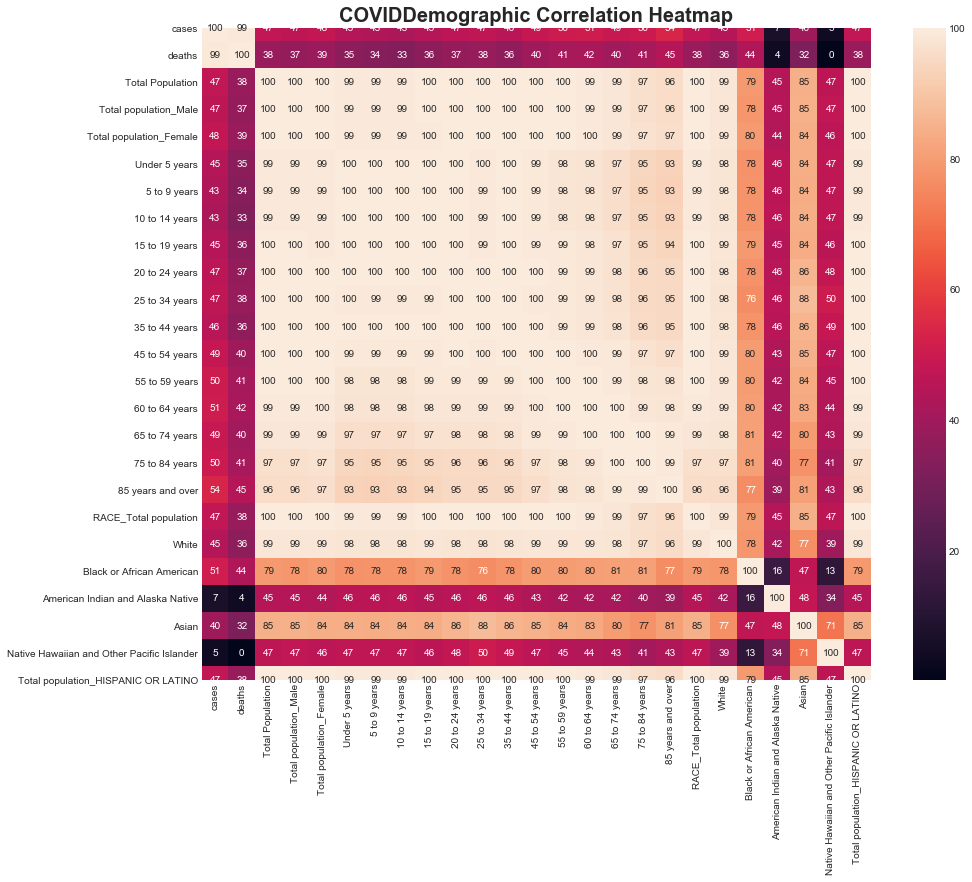

In [12]:
# Make the figsize 15 x 12
plt.figure(figsize=(15,12))

# Plot heatmap of annotated correlations
sns.heatmap(corr *100, annot=True, fmt = '.0f')

#Title
plt.title('COVIDDemographic Correlation Heatmap', fontweight = 'bold', fontsize = 20);


# Histogram

# Age

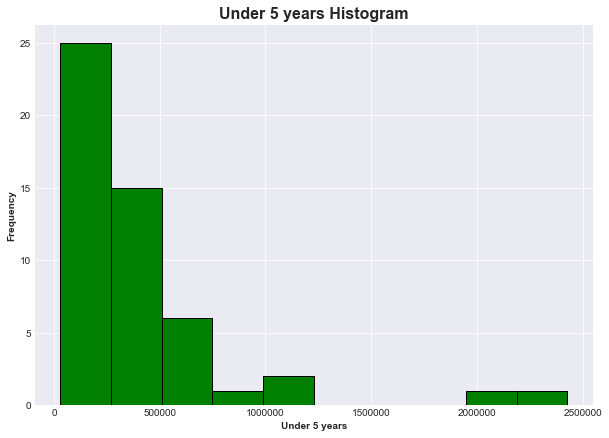

In [5]:
plt.style.use('seaborn-darkgrid')

df['Under 5 years'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('Under 5 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Under 5 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

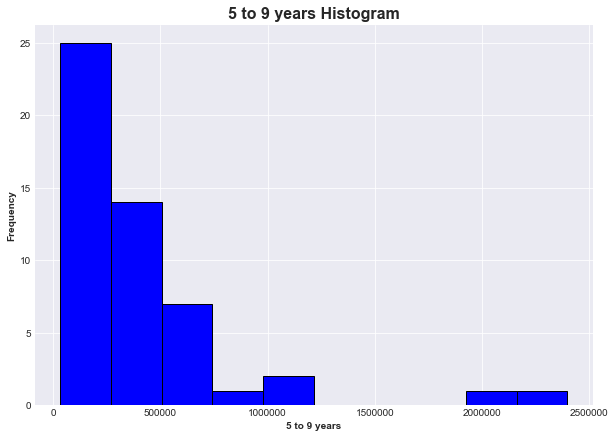

In [6]:
plt.style.use('seaborn-darkgrid')

df['5 to 9 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('5 to 9 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('5 to 9 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

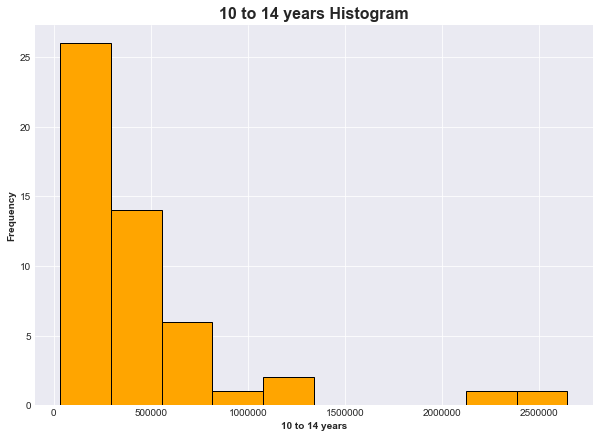

In [8]:
plt.style.use('seaborn-darkgrid')

df['10 to 14 years'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('10 to 14 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('10 to 14 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

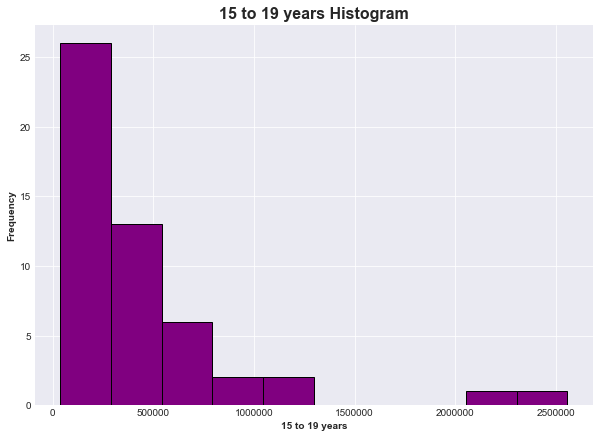

In [9]:
plt.style.use('seaborn-darkgrid')

df['15 to 19 years'].plot(kind = 'hist', color = 'purple', edgecolor = 'black', figsize = (10,7))
plt.title('15 to 19 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('15 to 19 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

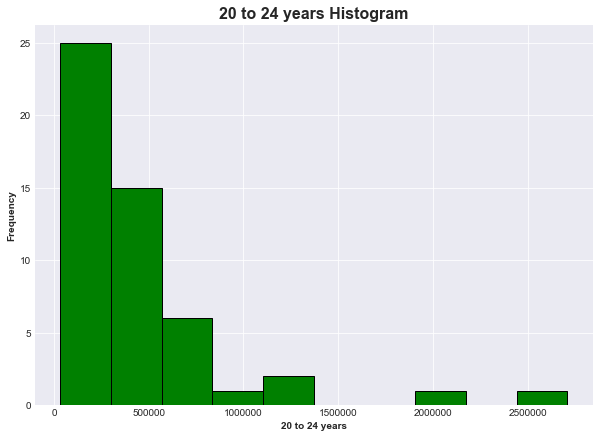

In [10]:
plt.style.use('seaborn-darkgrid')

df['20 to 24 years'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('20 to 24 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('20 to 24 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

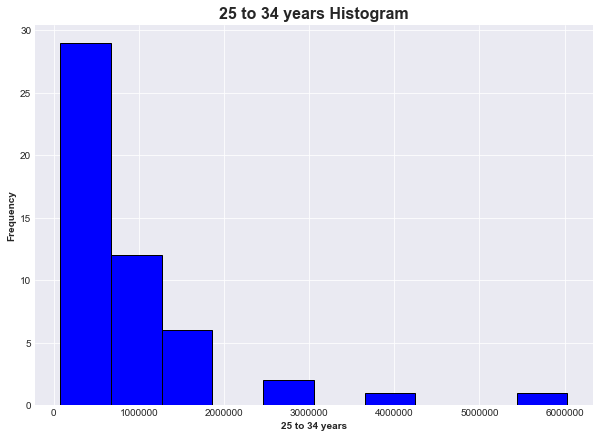

In [11]:
plt.style.use('seaborn-darkgrid')

df['25 to 34 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('25 to 34 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('25 to 34 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

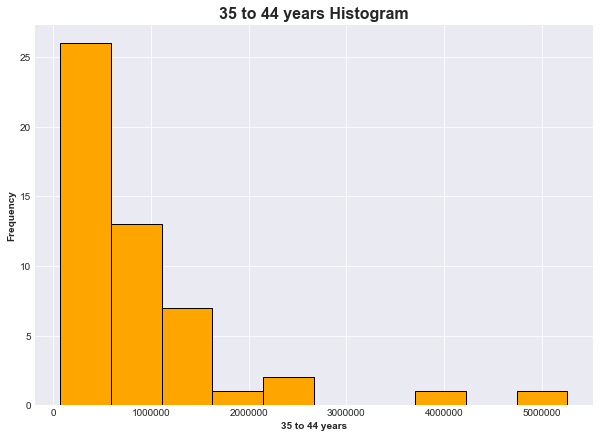

In [13]:
plt.style.use('seaborn-darkgrid')

df['35 to 44 years'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('35 to 44 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('35 to 44 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

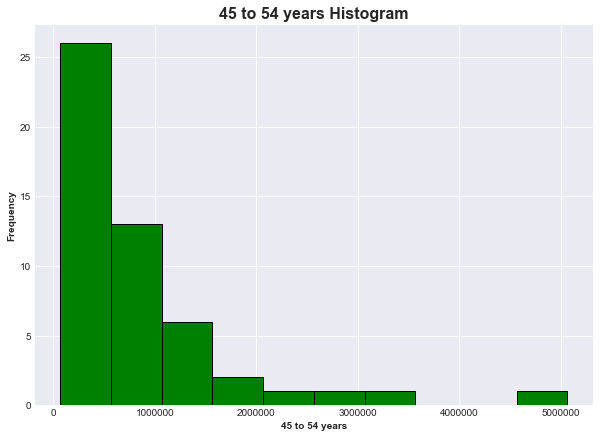

In [14]:
plt.style.use('seaborn-darkgrid')

df['45 to 54 years'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('45 to 54 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('45 to 54 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

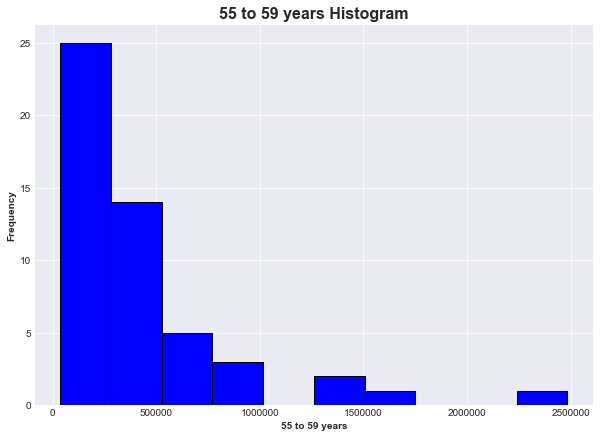

In [16]:
plt.style.use('seaborn-darkgrid')

df['55 to 59 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('55 to 59 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('55 to 59 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

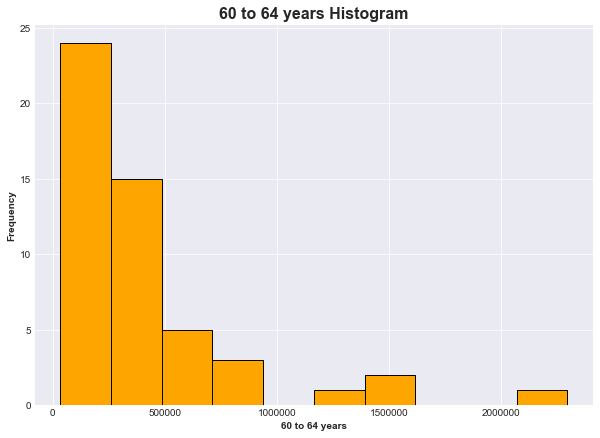

In [17]:
plt.style.use('seaborn-darkgrid')

df['60 to 64 years'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('60 to 64 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('60 to 64 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

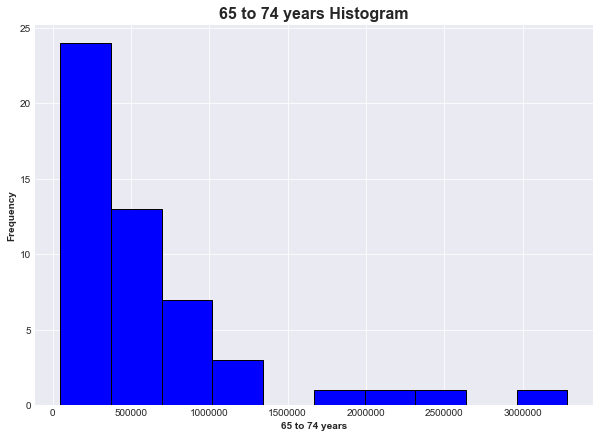

In [18]:
plt.style.use('seaborn-darkgrid')

df['65 to 74 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('65 to 74 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('65 to 74 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

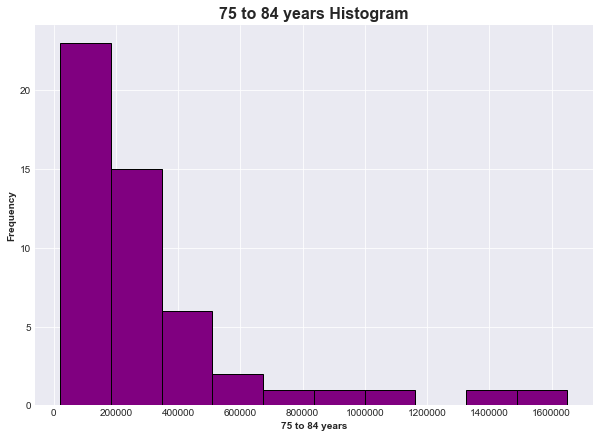

In [20]:
plt.style.use('seaborn-darkgrid')

df['75 to 84 years'].plot(kind = 'hist', color = 'purple', edgecolor = 'black', figsize = (10,7))
plt.title('75 to 84 years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('75 to 84 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

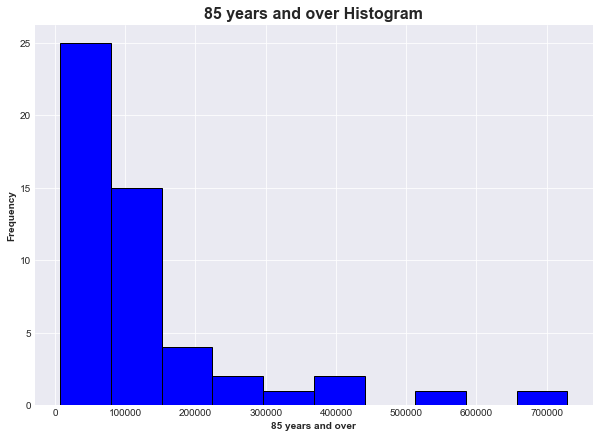

In [21]:
plt.style.use('seaborn-darkgrid')

df['85 years and over'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('85 years and over Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('85 years and over', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

# Violin Plot

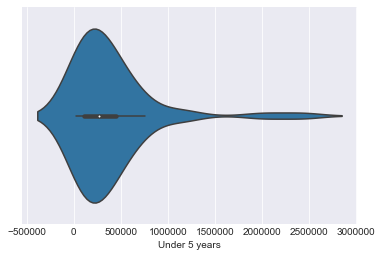

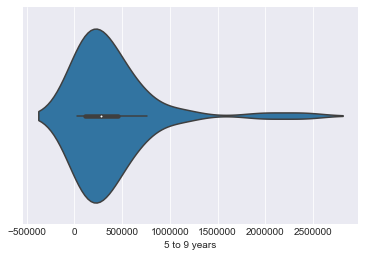

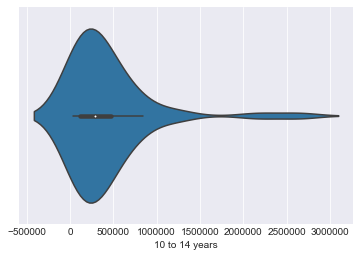

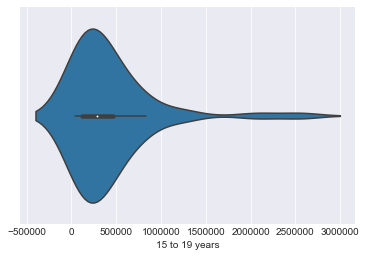

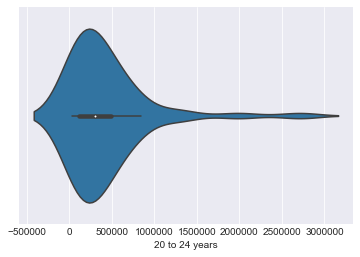

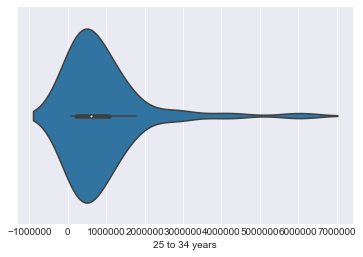

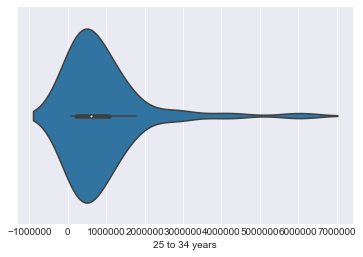

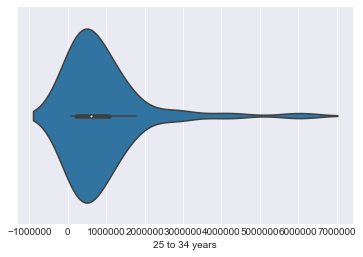

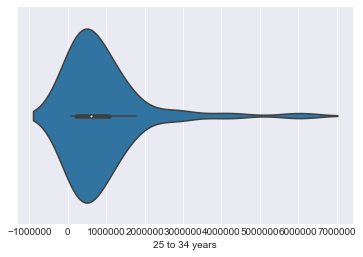

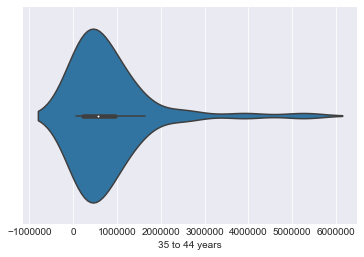

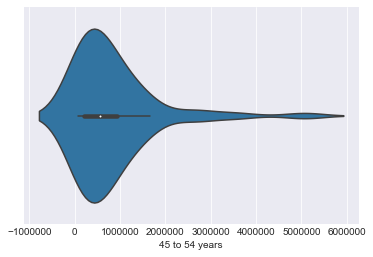

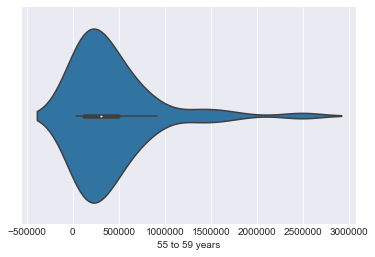

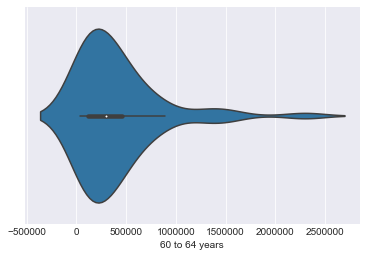

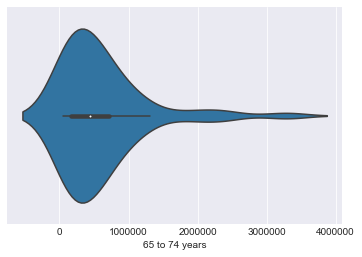

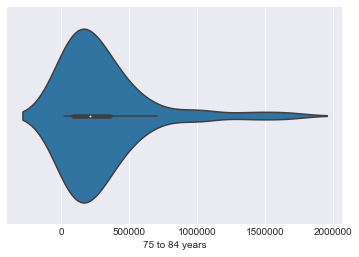

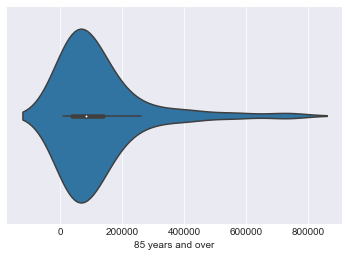

In [29]:
# Violin plot of Under 5 years
sns.violinplot(x='Under 5 years', data=df)
plt.show()

# Violin plot of 5 to 9 years
sns.violinplot(x='5 to 9 years', data=df)
plt.show()

# Violin plot of 10 to 14 years
sns.violinplot(x='10 to 14 years', data=df)
plt.show()

# Violin plot of 15 to 19 years
sns.violinplot(x='15 to 19 years', data=df)
plt.show()

# Violin plot of 20 to 24 years
sns.violinplot(x='20 to 24 years', data=df)
plt.show()

# Violin plot of 25 to 34 years
sns.violinplot(x='25 to 34 years', data=df)
plt.show()

# Violin plot of 25 to 34 years
sns.violinplot(x='25 to 34 years', data=df)
plt.show()


# Violin plot of 25 to 34 years
sns.violinplot(x='25 to 34 years', data=df)
plt.show()

# Violin plot of 25 to 34 years
sns.violinplot(x='25 to 34 years', data=df)
plt.show()


# Violin plot of 35 to 44 years
sns.violinplot(x='35 to 44 years', data=df)
plt.show()


# Violin plot of 45 to 54 years
sns.violinplot(x='45 to 54 years', data=df)
plt.show()

# Violin plot of 55 to 59 years
sns.violinplot(x='55 to 59 years', data=df)
plt.show()

# Violin plot of 60 to 64 years
sns.violinplot(x='60 to 64 years', data=df)
plt.show()

# Violin plot of 65 to 74 years
sns.violinplot(x='65 to 74 years', data=df)
plt.show()

# Violin plot of 75 to 84 years
sns.violinplot(x='75 to 84 years', data=df)
plt.show()

# Violin plot of 85 years and over
sns.violinplot(x='85 years and over', data=df)
plt.show()



# AGE VS COVID-19 Case Count

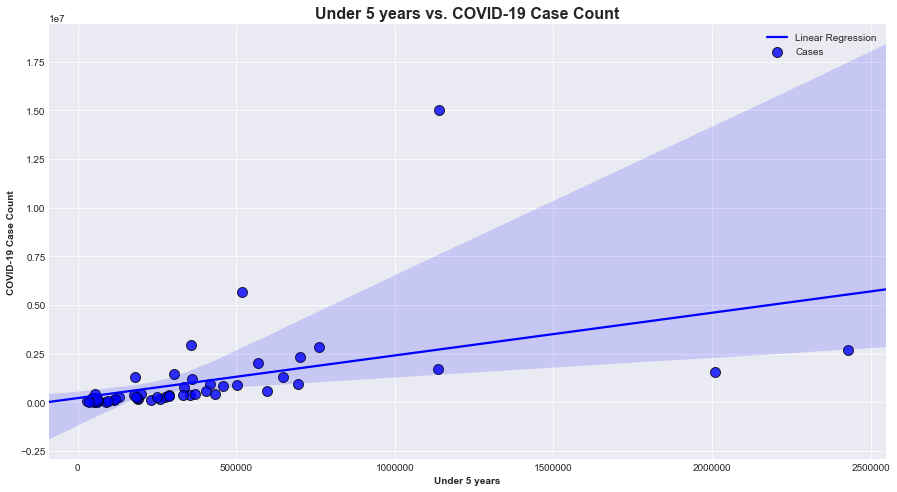

In [30]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Under 5 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Under 5 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Under 5 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# AGE - Ordinary Least Square Regression(OLS)

In [31]:
model1 = sm.OLS(df['cases'], df['Under 5 years']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.341
Model:                            OLS   Adj. R-squared (uncentered):              0.328
Method:                 Least Squares   F-statistic:                              25.88
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    5.49e-06
Time:                        17:23:13   Log-Likelihood:                         -812.33
No. Observations:                  51   AIC:                                      1627.
Df Residuals:                      50   BIC:                                      1629.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Under 5 years     2.4239      0.476      5.087      0.000       1.467       3.381
==============================================================================
Omnibus:                       83.920   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1461.323
Skew:                           4.429   Prob(JB):                         0.00
Kurtosis:                      27.682   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

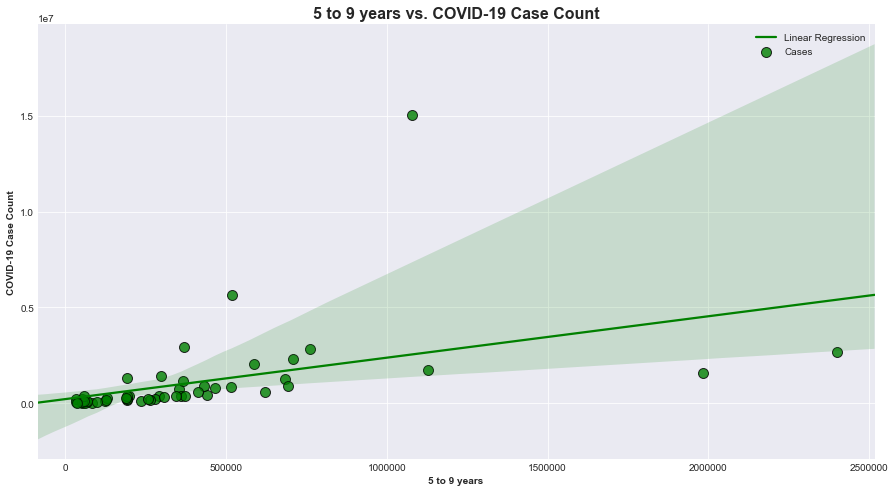

In [32]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '5 to 9 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('5 to 9 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('5 to 9 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [33]:
model2 = sm.OLS(df['cases'], df['5 to 9 years']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.332
Model:                            OLS   Adj. R-squared (uncentered):              0.318
Method:                 Least Squares   F-statistic:                              24.82
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    7.91e-06
Time:                        17:24:21   Log-Likelihood:                         -812.69
No. Observations:                  51   AIC:                                      1627.
Df Residuals:                      50   BIC:                                      1629.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
5 to 9 years     2.4015      0.482      4.982      0.000       1.433       3.370
==============================================================================
Omnibus:                       85.404   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1543.559
Skew:                           4.540   Prob(JB):                         0.00
Kurtosis:                      28.376   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

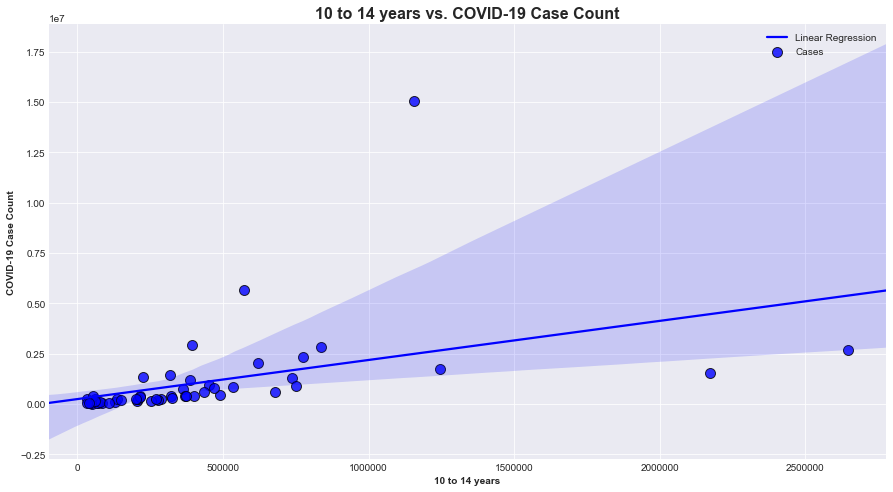

In [34]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '10 to 14 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('10 to 14 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('10 to 14 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [35]:
model3 = sm.OLS(df['cases'], df['10 to 14 years']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.327
Model:                            OLS   Adj. R-squared (uncentered):              0.314
Method:                 Least Squares   F-statistic:                              24.30
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    9.49e-06
Time:                        17:25:27   Log-Likelihood:                         -812.87
No. Observations:                  51   AIC:                                      1628.
Df Residuals:                      50   BIC:                                      1630.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
10 to 14 years     2.1869      0.444      4.929      0.000       1.296       3.078
==============================================================================
Omnibus:                       85.544   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1556.002
Skew:                           4.548   Prob(JB):                         0.00
Kurtosis:                      28.485   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

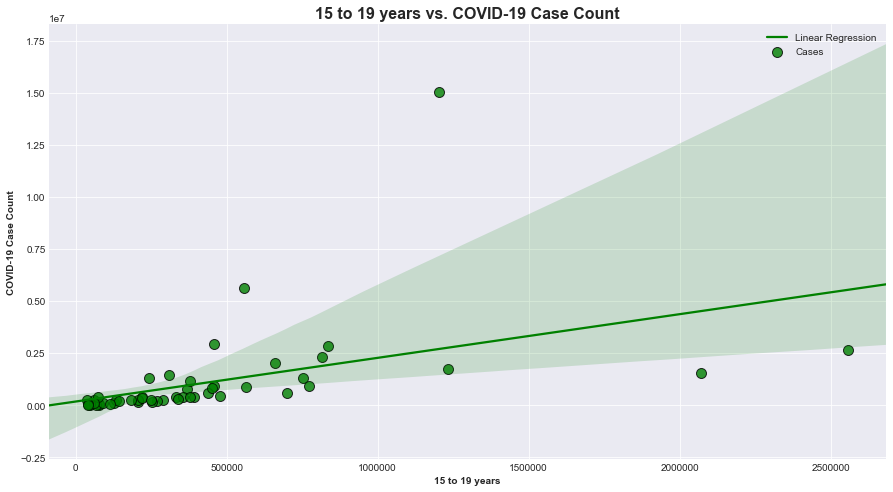

In [36]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '15 to 19 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('15 to 19 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('15 to 19 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [37]:
model4 = sm.OLS(df['cases'], df['15 to 19 years']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.345
Model:                            OLS   Adj. R-squared (uncentered):              0.332
Method:                 Least Squares   F-statistic:                              26.39
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    4.63e-06
Time:                        17:26:20   Log-Likelihood:                         -812.16
No. Observations:                  51   AIC:                                      1626.
Df Residuals:                      50   BIC:                                      1628.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
15 to 19 years     2.2783      0.444      5.137      0.000       1.387       3.169
==============================================================================
Omnibus:                       85.345   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1541.654
Skew:                           4.535   Prob(JB):                         0.00
Kurtosis:                      28.362   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

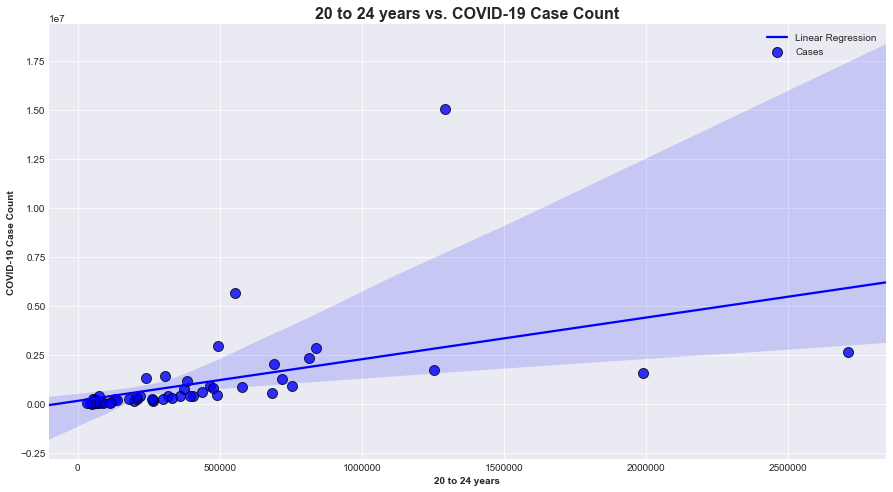

In [38]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '20 to 24 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('20 to 24 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('20 to 24 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [39]:
model5 = sm.OLS(df['cases'], df['20 to 24 years']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.359
Model:                            OLS   Adj. R-squared (uncentered):              0.346
Method:                 Least Squares   F-statistic:                              28.00
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    2.70e-06
Time:                        17:27:12   Log-Likelihood:                         -811.63
No. Observations:                  51   AIC:                                      1625.
Df Residuals:                      50   BIC:                                      1627.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
20 to 24 years     2.2785      0.431      5.291      0.000       1.414       3.143
==============================================================================
Omnibus:                       84.076   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1471.192
Skew:                           4.440   Prob(JB):                         0.00
Kurtosis:                      27.768   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

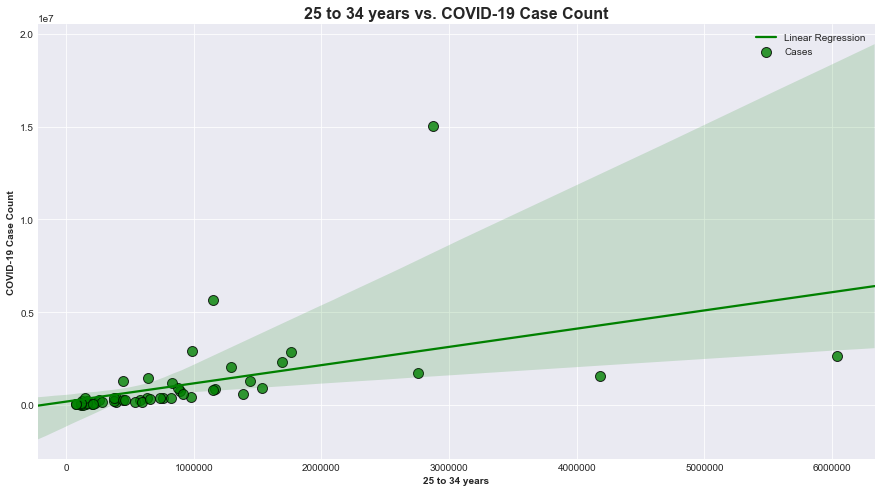

In [40]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '25 to 34 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('25 to 34 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('25 to 34 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [41]:
model6 = sm.OLS(df['cases'], df['25 to 34 years']).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.362
Model:                            OLS   Adj. R-squared (uncentered):              0.349
Method:                 Least Squares   F-statistic:                              28.37
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    2.38e-06
Time:                        17:31:13   Log-Likelihood:                         -811.50
No. Observations:                  51   AIC:                                      1625.
Df Residuals:                      50   BIC:                                      1627.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
25 to 34 years     1.0671      0.200      5.327      0.000       0.665       1.470
==============================================================================
Omnibus:                       82.215   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.593
Skew:                           4.302   Prob(JB):                    3.24e-299
Kurtosis:                      26.934   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

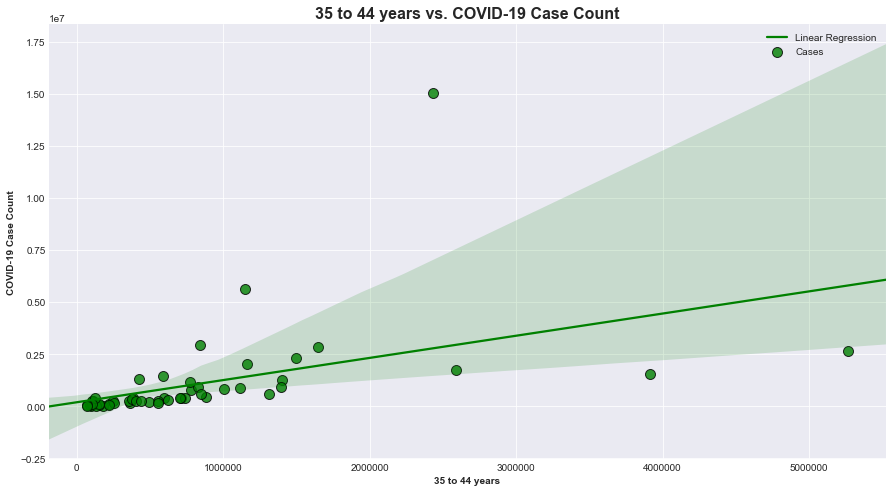

In [42]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '35 to 44 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('35 to 44 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('35 to 44 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [43]:
model7 = sm.OLS(df['cases'], df['35 to 44 years']).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.350
Model:                            OLS   Adj. R-squared (uncentered):              0.337
Method:                 Least Squares   F-statistic:                              26.94
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    3.84e-06
Time:                        17:32:08   Log-Likelihood:                         -811.98
No. Observations:                  51   AIC:                                      1626.
Df Residuals:                      50   BIC:                                      1628.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
35 to 44 years     1.1629      0.224      5.190      0.000       0.713       1.613
==============================================================================
Omnibus:                       84.227   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1483.886
Skew:                           4.449   Prob(JB):                         0.00
Kurtosis:                      27.882   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

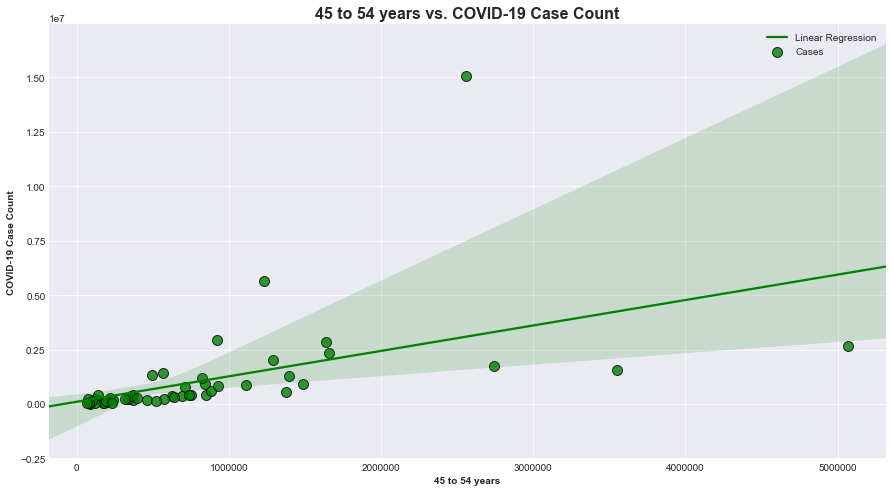

In [44]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '45 to 54 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('45 to 54 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('45 to 54 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [45]:
model8 = sm.OLS(df['cases'], df['45 to 54 years']).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.378
Model:                            OLS   Adj. R-squared (uncentered):              0.365
Method:                 Least Squares   F-statistic:                              30.37
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    1.25e-06
Time:                        17:33:01   Log-Likelihood:                         -810.86
No. Observations:                  51   AIC:                                      1624.
Df Residuals:                      50   BIC:                                      1626.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
45 to 54 years     1.2227      0.222      5.511      0.000       0.777       1.668
==============================================================================
Omnibus:                       84.162   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1485.348
Skew:                           4.441   Prob(JB):                         0.00
Kurtosis:                      27.902   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

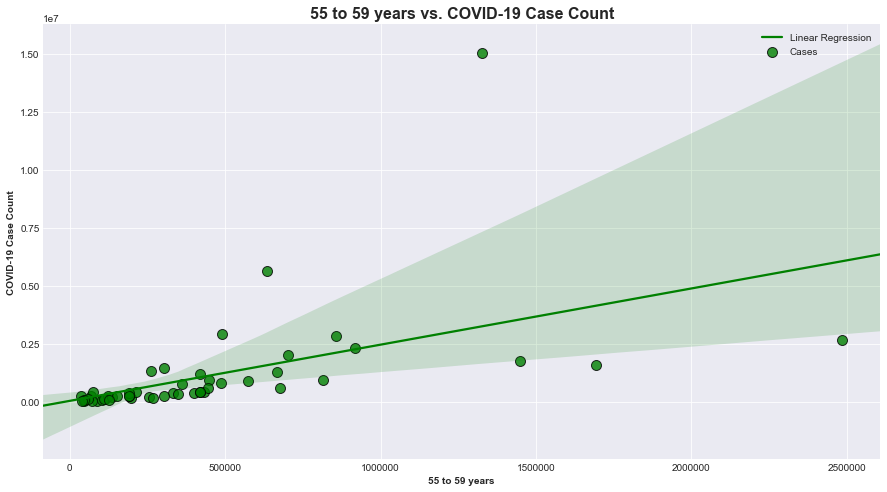

In [46]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '55 to 59 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('55 to 59 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('55 to 59 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [47]:
model9 = sm.OLS(df['cases'], df['55 to 59 years']).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.391
Model:                            OLS   Adj. R-squared (uncentered):              0.379
Method:                 Least Squares   F-statistic:                              32.10
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    7.21e-07
Time:                        17:34:12   Log-Likelihood:                         -810.32
No. Observations:                  51   AIC:                                      1623.
Df Residuals:                      50   BIC:                                      1625.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
55 to 59 years     2.4537      0.433      5.665      0.000       1.584       3.324
==============================================================================
Omnibus:                       84.882   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1518.167
Skew:                           4.499   Prob(JB):                         0.00
Kurtosis:                      28.169   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

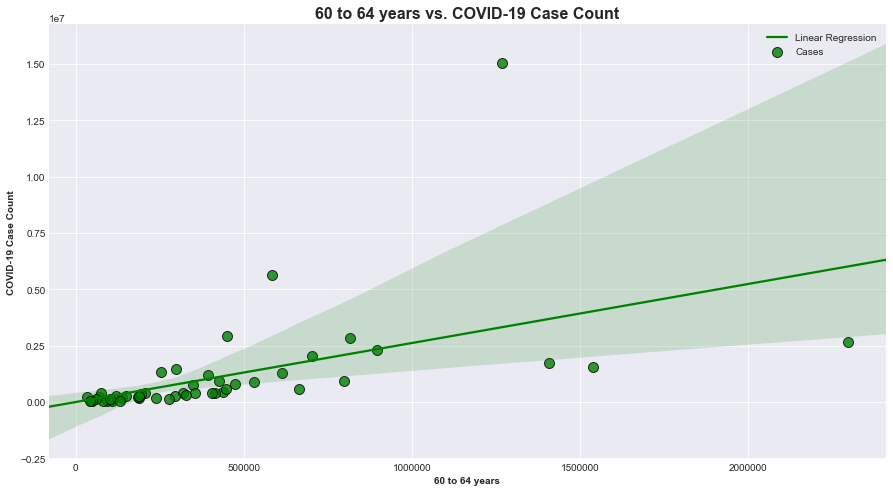

In [48]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '60 to 64 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('60 to 64 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('60 to 64 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [49]:
model10 = sm.OLS(df['cases'], df['60 to 64 years']).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.395
Model:                            OLS   Adj. R-squared (uncentered):              0.383
Method:                 Least Squares   F-statistic:                              32.66
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    6.06e-07
Time:                        17:35:13   Log-Likelihood:                         -810.15
No. Observations:                  51   AIC:                                      1622.
Df Residuals:                      50   BIC:                                      1624.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
60 to 64 years     2.6146      0.458      5.715      0.000       1.696       3.534
==============================================================================
Omnibus:                       85.103   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1519.471
Skew:                           4.521   Prob(JB):                         0.00
Kurtosis:                      28.165   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

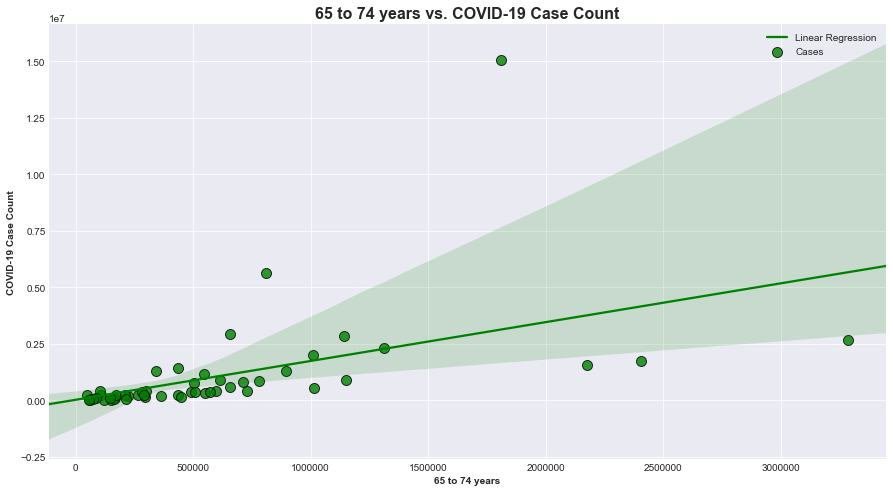

In [50]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '65 to 74 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('65 to 74 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('65 to 74 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [51]:
model11 = sm.OLS(df['cases'], df['65 to 74 years']).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.380
Model:                            OLS   Adj. R-squared (uncentered):              0.368
Method:                 Least Squares   F-statistic:                              30.65
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    1.14e-06
Time:                        17:36:14   Log-Likelihood:                         -810.78
No. Observations:                  51   AIC:                                      1624.
Df Residuals:                      50   BIC:                                      1625.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
65 to 74 years     1.7385      0.314      5.536      0.000       1.108       2.369
==============================================================================
Omnibus:                       85.416   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1523.609
Skew:                           4.552   Prob(JB):                         0.00
Kurtosis:                      28.182   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

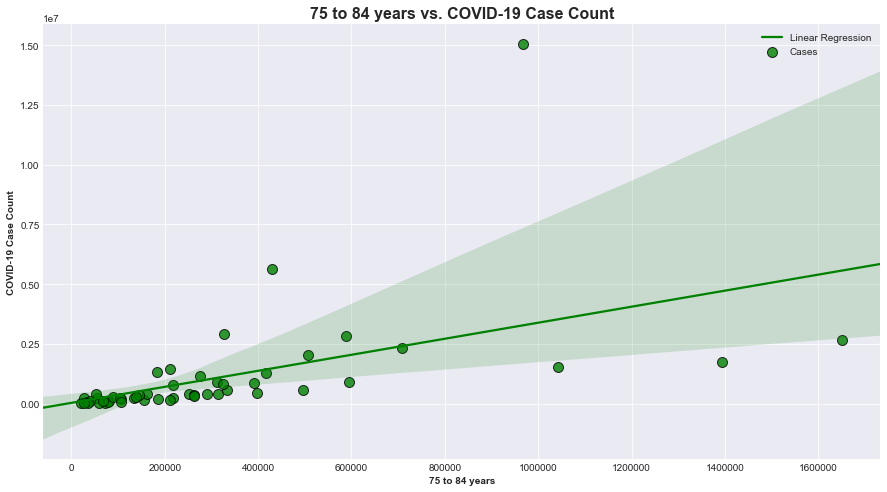

In [53]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '75 to 84 years', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('75 to 84 years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('75 to 84 years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [54]:
model12 = sm.OLS(df['cases'], df['75 to 84 years']).fit()
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.388
Model:                            OLS   Adj. R-squared (uncentered):              0.376
Method:                 Least Squares   F-statistic:                              31.74
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    8.07e-07
Time:                        17:37:34   Log-Likelihood:                         -810.43
No. Observations:                  51   AIC:                                      1623.
Df Residuals:                      50   BIC:                                      1625.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
75 to 84 years     3.4040      0.604      5.634      0.000       2.190       4.618
==============================================================================
Omnibus:                       84.035   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1451.454
Skew:                           4.446   Prob(JB):                         0.00
Kurtosis:                      27.576   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

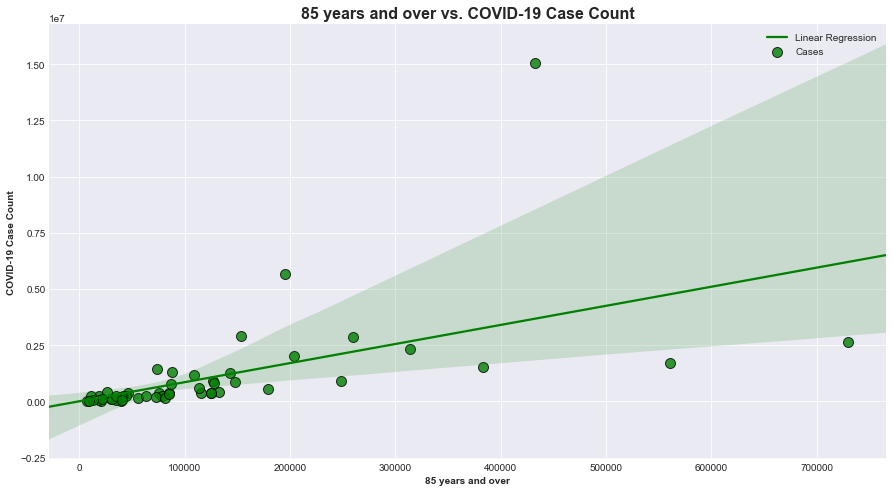

In [55]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '85 years and over', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('85 years and over vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('85 years and over', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [56]:
model13 = sm.OLS(df['cases'], df['85 years and over']).fit()
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.419
Model:                            OLS   Adj. R-squared (uncentered):              0.407
Method:                 Least Squares   F-statistic:                              36.02
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    2.18e-07
Time:                        17:38:32   Log-Likelihood:                         -809.13
No. Observations:                  51   AIC:                                      1620.
Df Residuals:                      50   BIC:                                      1622.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
85 years and over     8.5149      1.419      6.002      0.000       5.665      11.365
==============================================================================
Omnibus:                       82.005   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1373.892
Skew:                           4.281   Prob(JB):                    4.60e-299
Kurtosis:                      26.942   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ALL AGES - Ordinary Least Square Regression(OLS)

In [57]:
model14 = sm.OLS(df['cases'], df[['Under 5 years', '5 to 9 years', '10 to 14 years',
                                       '15 to 19 years', '20 to 24 years',
                                       '25 to 34 years','35 to 44 years','45 to 54 years',
                                 '55 to 59 years','60 to 64 years','65 to 74 years',
                                 '75 to 84 years','85 years and over']]).fit()
model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.829
Model:                            OLS   Adj. R-squared (uncentered):              0.771
Method:                 Least Squares   F-statistic:                              14.19
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    8.75e-11
Time:                        17:42:20   Log-Likelihood:                         -777.91
No. Observations:                  51   AIC:                                      1582.
Df Residuals:                      38   BIC:                                      1607.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Under 5 years        95.5715     24.432      3.912      0.000      46.111     145.032
5 to 9 years        -75.0656     38.139     -1.968      0.056    -152.275       2.143
10 to 14 years      -76.2965     21.870     -3.489      0.001    -120.570     -32.023
15 to 19 years       36.0862     19.835      1.819      0.077      -4.068      76.240
20 to 24 years        6.1029     15.864      0.385      0.703     -26.012      38.218
25 to 34 years      -11.9589      7.058     -1.694      0.098     -26.247       2.329
35 to 44 years       19.8627     12.927      1.537      0.133      -6.306      46.032
45 to 54 years        3.0750     10.394      0.296      0.769     -17.967      24.117
55 to 59 years      -10.9091     24.369     -0.448      0.657     -60.242      38.424
60 to 64 years       35.6323     22.559      1.580      0.123     -10.036      81.301
65 to 74 years      -21.7088     18.462     -1.176      0.247     -59.083      15.665
75 to 84 years       15.2165     26.405      0.576      0.568     -38.237      68.670
85 years and over   -15.9386     30.346     -0.525      0.602     -77.370      45.493
==============================================================================
Omnibus:                        5.084   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                4.284
Skew:                           0.465   Prob(JB):                        0.117
Kurtosis:                       4.073   Cond. No.                         892.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# AGE VS COVID-19 Case Per State

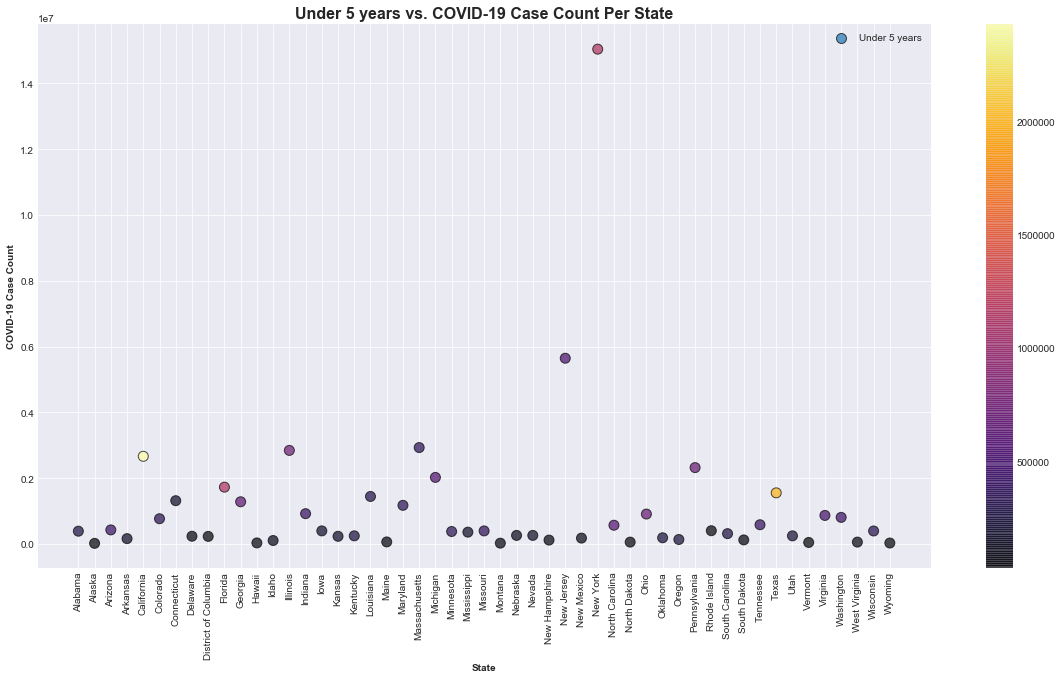

In [59]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Under 5 years'], cmap = 'inferno')
plt.title('Under 5 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Under 5 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

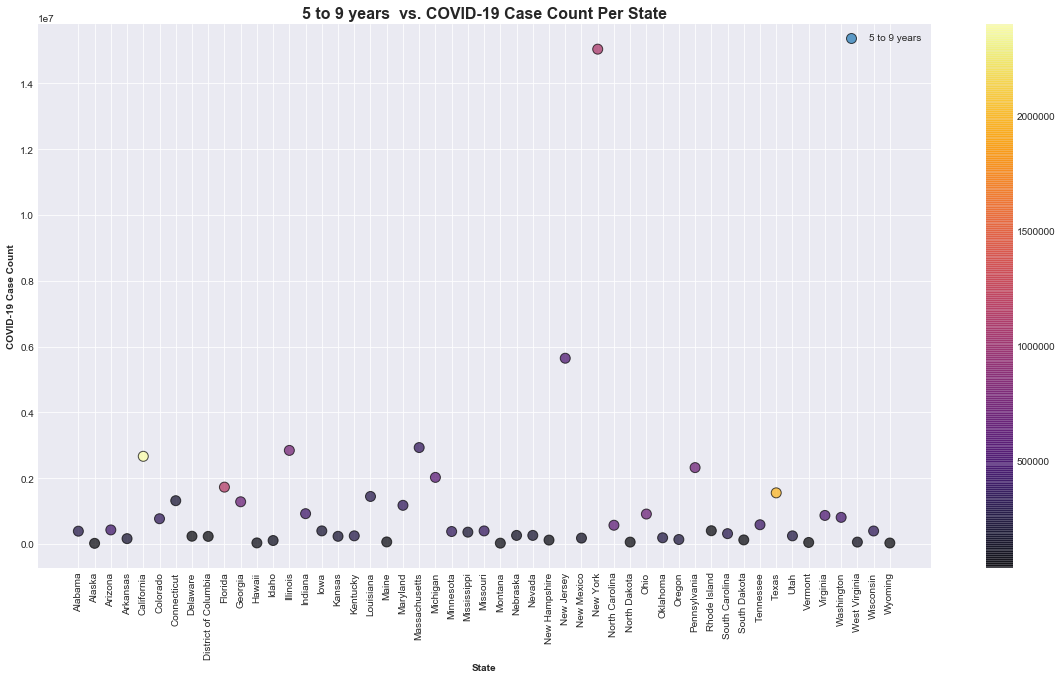

In [60]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['5 to 9 years'], cmap = 'inferno')
plt.title('5 to 9 years  vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['5 to 9 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

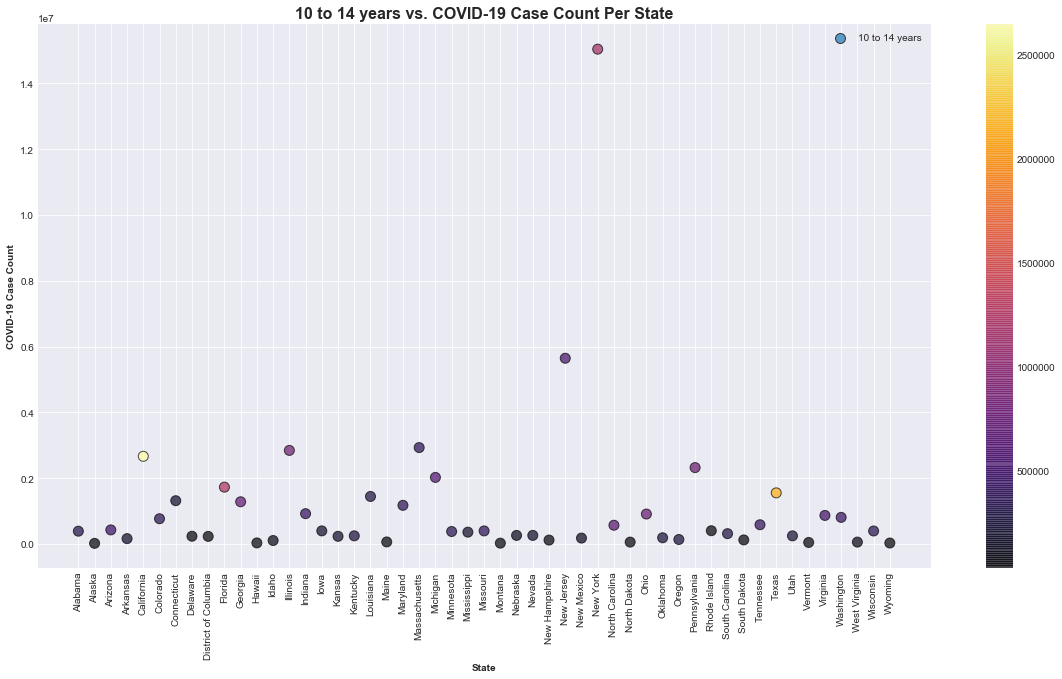

In [61]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['10 to 14 years'], cmap = 'inferno')
plt.title('10 to 14 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['10 to 14 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

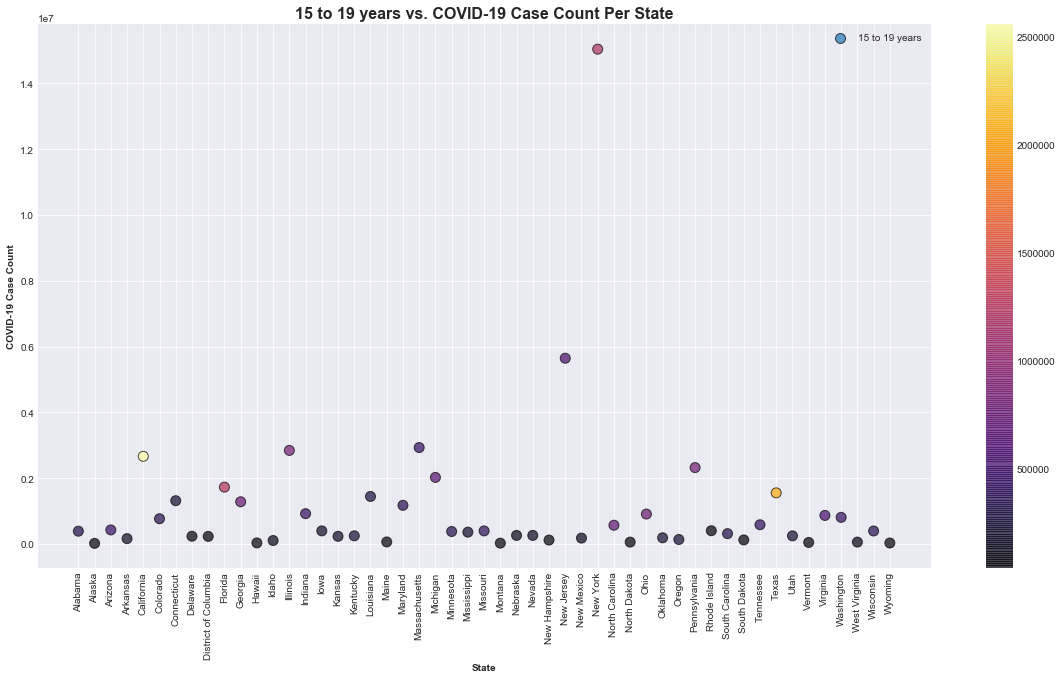

In [62]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['15 to 19 years'], cmap = 'inferno')
plt.title('15 to 19 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['15 to 19 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

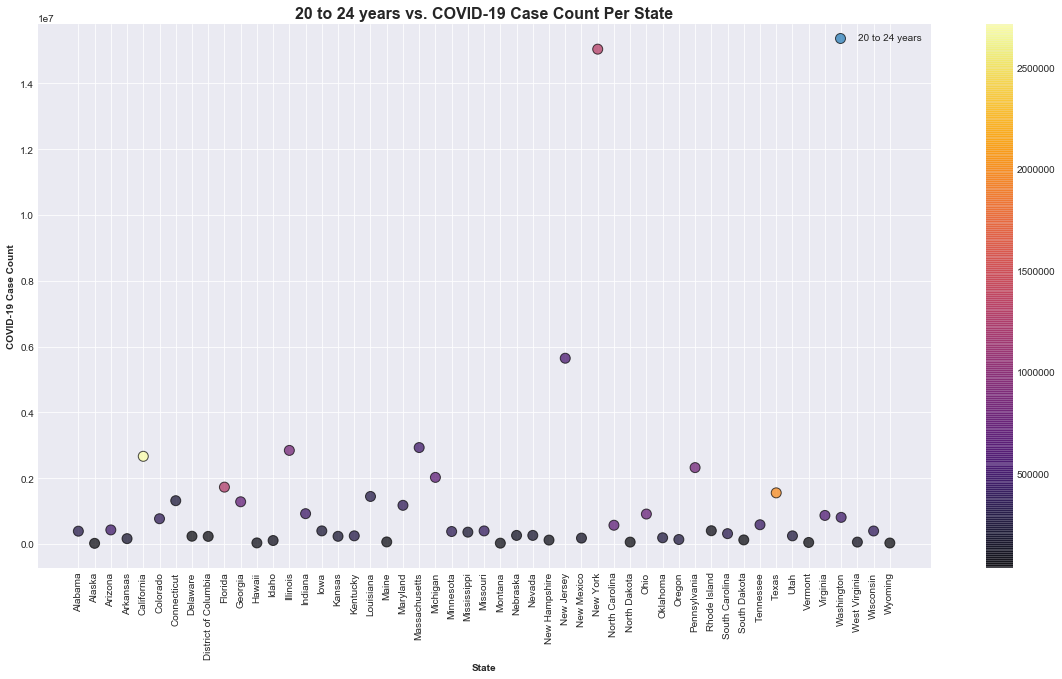

In [63]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['20 to 24 years'], cmap = 'inferno')
plt.title('20 to 24 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['20 to 24 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

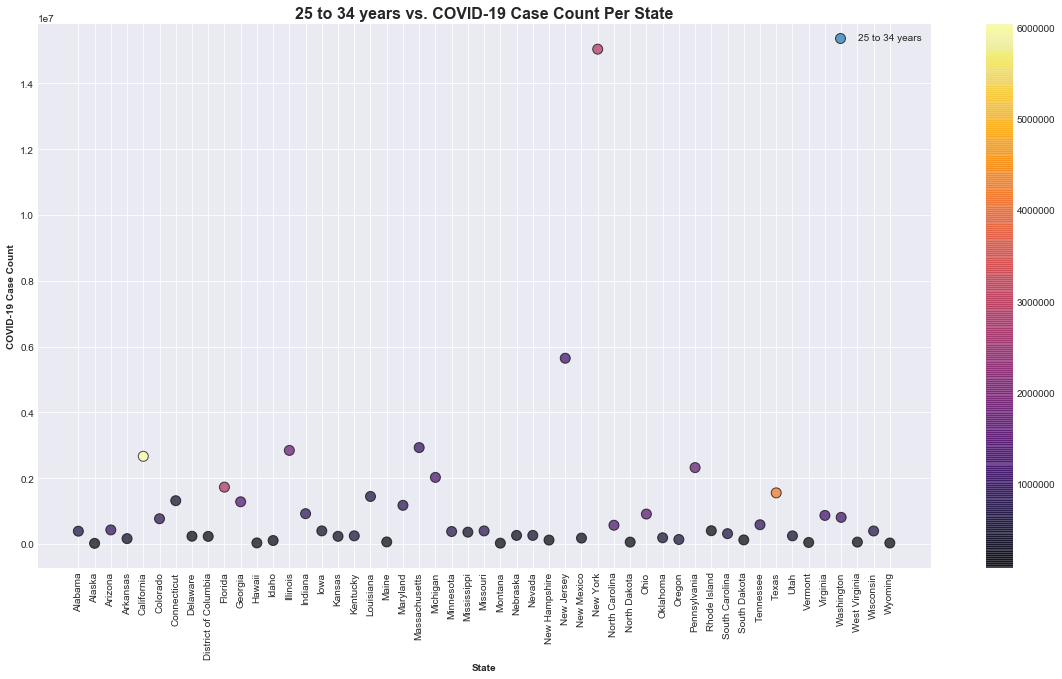

In [64]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['25 to 34 years'], cmap = 'inferno')
plt.title('25 to 34 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['25 to 34 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

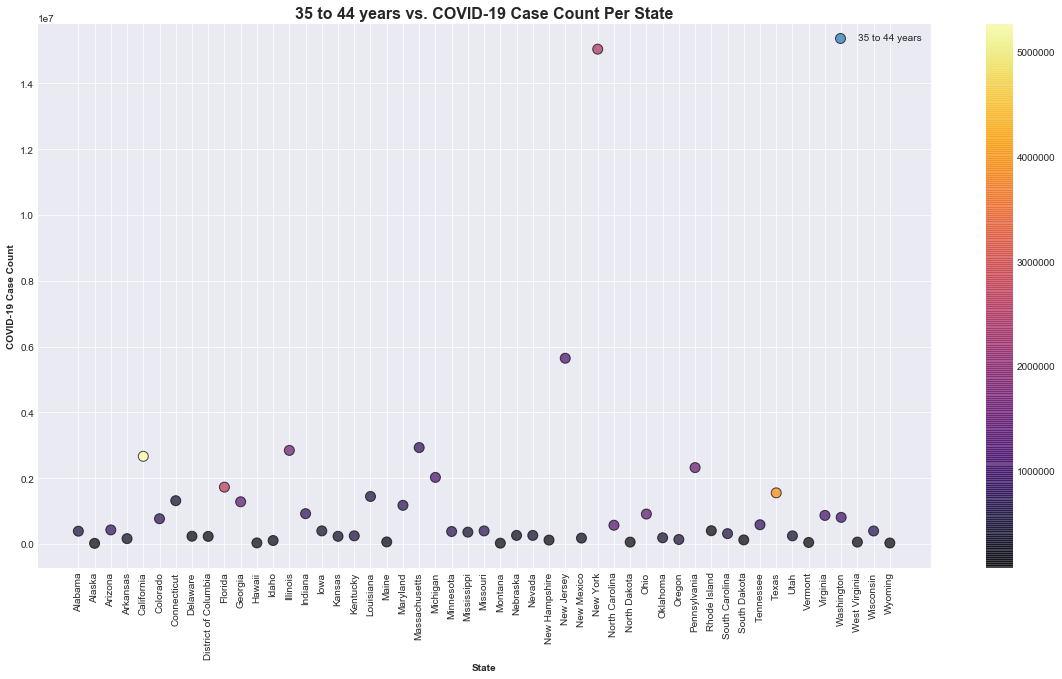

In [65]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['35 to 44 years'], cmap = 'inferno')
plt.title('35 to 44 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['35 to 44 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

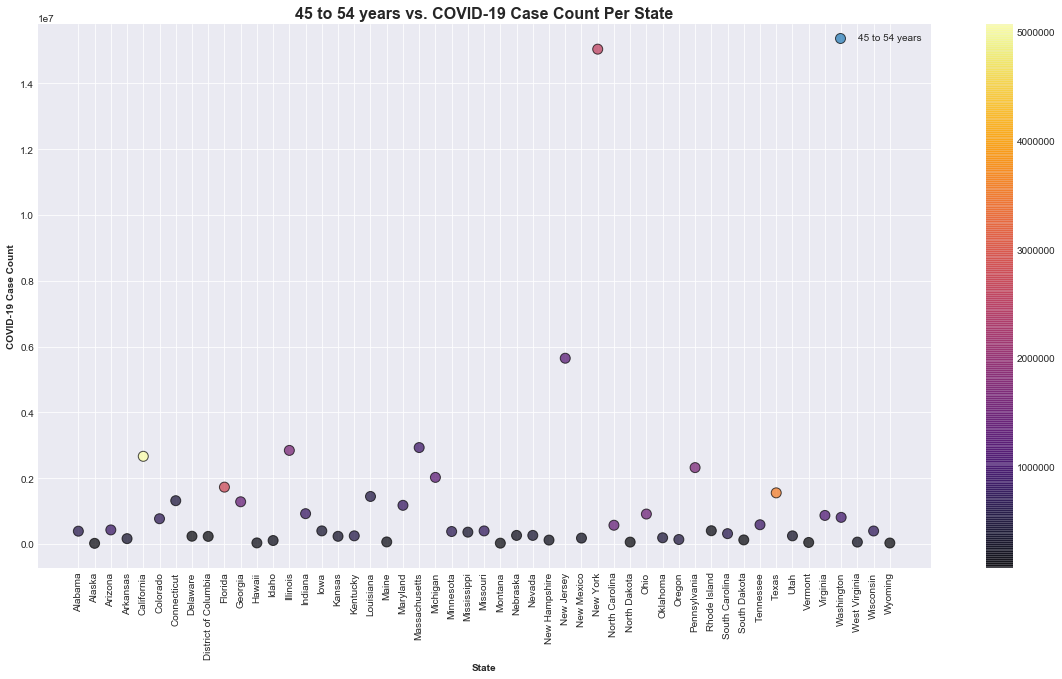

In [66]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['45 to 54 years'], cmap = 'inferno')
plt.title('45 to 54 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['45 to 54 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

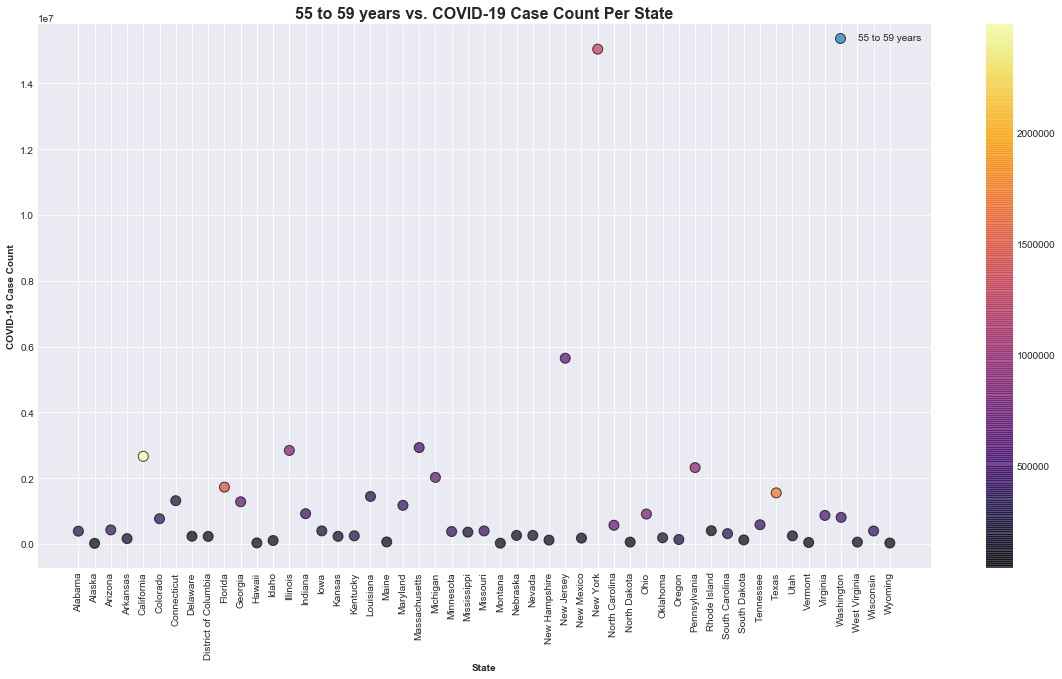

In [67]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['55 to 59 years'], cmap = 'inferno')
plt.title('55 to 59 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['55 to 59 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

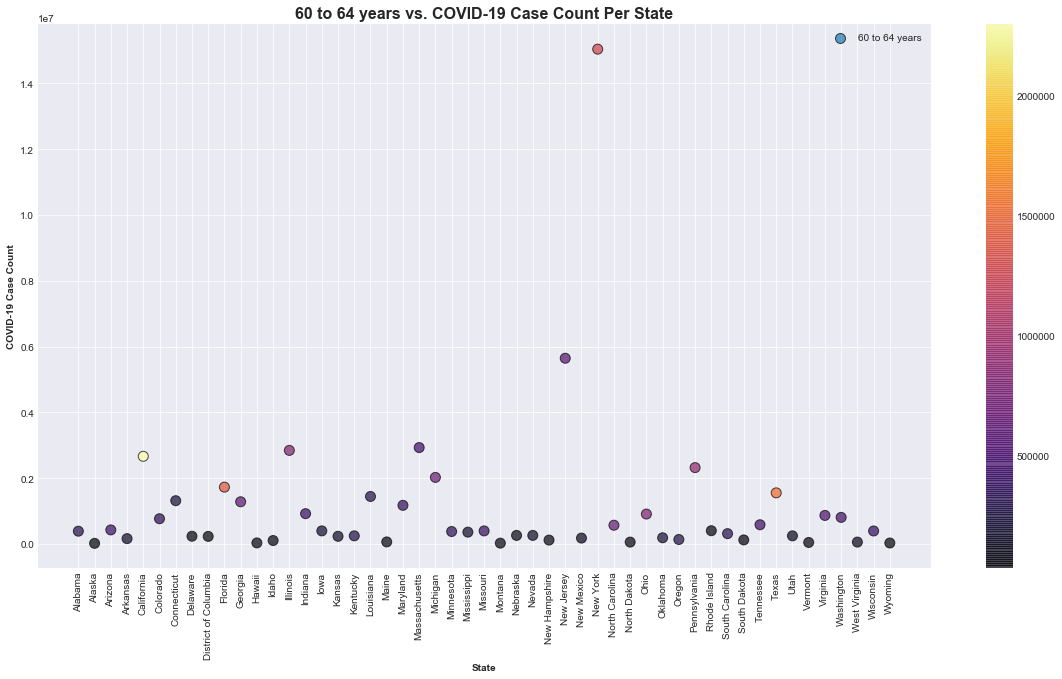

In [68]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['60 to 64 years'], cmap = 'inferno')
plt.title('60 to 64 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['60 to 64 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

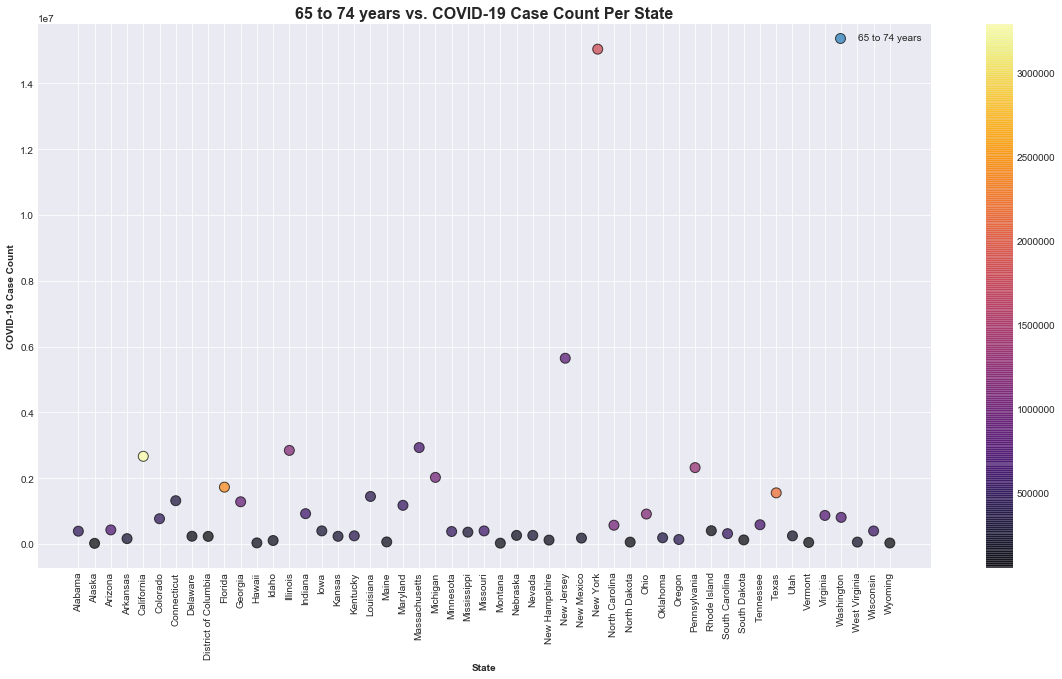

In [69]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['65 to 74 years'], cmap = 'inferno')
plt.title('65 to 74 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['65 to 74 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

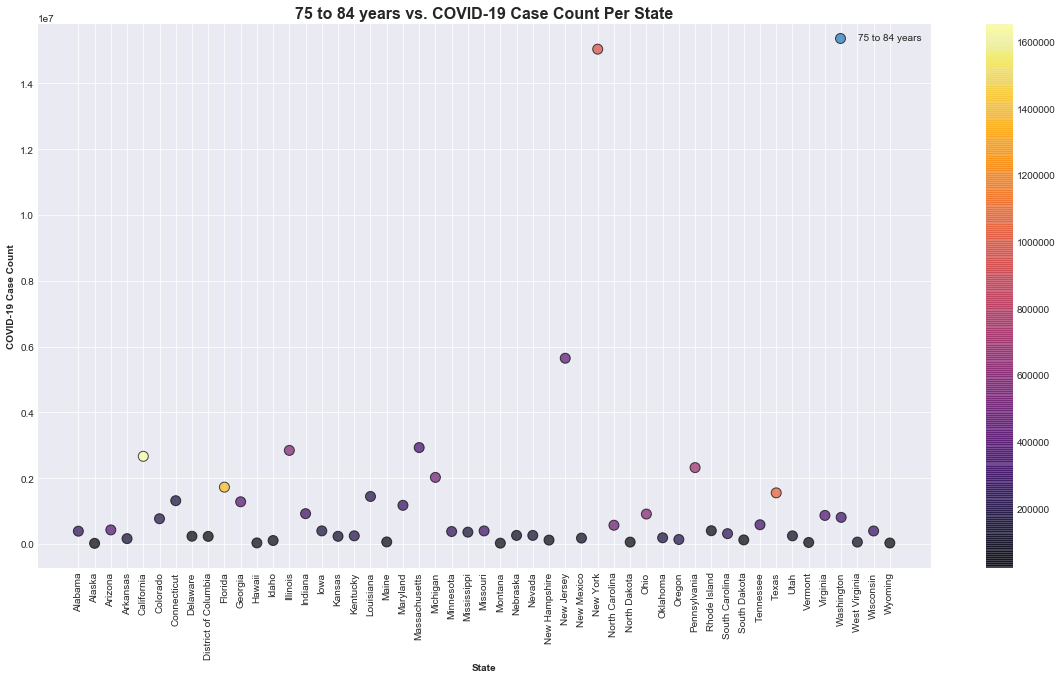

In [70]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['75 to 84 years'], cmap = 'inferno')
plt.title('75 to 84 years vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['75 to 84 years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

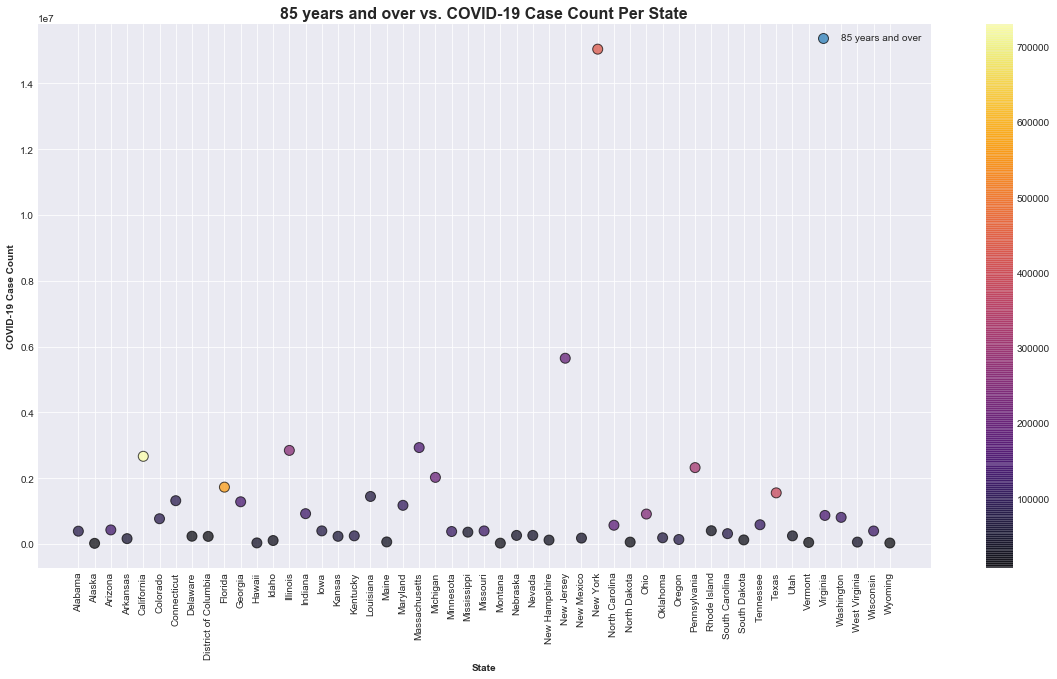

In [71]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['85 years and over'], cmap = 'inferno')
plt.title('85 years and over vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['85 years and over'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

# AGE - R SQUARE VALUE

In [72]:
X = df[['Under 5 years']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

DemographicModel = LinearRegression()
DemographicModel.fit(train_X, train_y)

predictions = DemographicModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1428373.2137201554
MSE Value: 13542124486119.291
RMS Value: 3679962.5658584205
R2 Score: 0.11775020264454339


In [73]:
X = df[['5 to 9 years']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

DemographicModel = LinearRegression()
DemographicModel.fit(train_X, train_y)

predictions = DemographicModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1425630.1125035542
MSE Value: 13684741268556.873
RMS Value: 3699289.2923583137
R2 Score: 0.10845892581910788


In [74]:
X = df[['10 to 14 years']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

DemographicModel = LinearRegression()
DemographicModel.fit(train_X, train_y)

predictions = DemographicModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1435460.4198749673
MSE Value: 13732876564189.133
RMS Value: 3705789.6006369726
R2 Score: 0.10532298102250404


In [75]:
X = df[['15 to 19 years']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

DemographicModel = LinearRegression()
DemographicModel.fit(train_X, train_y)

predictions = DemographicModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1416918.885698177
MSE Value: 13467853428319.385
RMS Value: 3669857.412532452
R2 Score: 0.1225888544942223


In [76]:
X = df[['20 to 24 years']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

DemographicModel = LinearRegression()
DemographicModel.fit(train_X, train_y)

predictions = DemographicModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1414700.4053131414
MSE Value: 13161991526948.455
RMS Value: 3627945.910146464
R2 Score: 0.14251531439199172


In [77]:
X = df[['25 to 34 years']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

DemographicModel = LinearRegression()
DemographicModel.fit(train_X, train_y)

predictions = DemographicModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1434684.6269602699
MSE Value: 13045208028397.94
RMS Value: 3611815.060104537
R2 Score: 0.15012359018625587


In [78]:
X = df[['35 to 44 years']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

DemographicModel = LinearRegression()
DemographicModel.fit(train_X, train_y)

predictions = DemographicModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1430087.062734229
MSE Value: 13319470655939.74
RMS Value: 3649584.9977688887
R2 Score: 0.1322557772135612


In [79]:
X = df[['45 to 54 years']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

DemographicModel = LinearRegression()
DemographicModel.fit(train_X, train_y)

predictions = DemographicModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1403128.613196638
MSE Value: 12884050467397.121
RMS Value: 3589435.953934423
R2 Score: 0.1606227718826735


In [80]:
X = df[['55 to 59 years']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

DemographicModel = LinearRegression()
DemographicModel.fit(train_X, train_y)

predictions = DemographicModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1364943.148304358
MSE Value: 12720062918720.658
RMS Value: 3566519.720781123
R2 Score: 0.17130632317751804


In [81]:
X = df[['60 to 64 years']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

DemographicModel = LinearRegression()
DemographicModel.fit(train_X, train_y)

predictions = DemographicModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1361783.599486527
MSE Value: 12670384102958.986
RMS Value: 3559548.300411021
R2 Score: 0.1745428260750893


In [82]:
X = df[['65 to 74 years']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

DemographicModel = LinearRegression()
DemographicModel.fit(train_X, train_y)

predictions = DemographicModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1382918.4533492466
MSE Value: 13010382611033.092
RMS Value: 3606990.7971927365
R2 Score: 0.15239241569029327


In [83]:
X = df[['75 to 84 years']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

DemographicModel = LinearRegression()
DemographicModel.fit(train_X, train_y)

predictions = DemographicModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1382483.9156566758
MSE Value: 12967154236634.059
RMS Value: 3600993.506885851
R2 Score: 0.1552086816751943


In [84]:
X = df[['85 years and over']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

DemographicModel = LinearRegression()
DemographicModel.fit(train_X, train_y)

predictions = DemographicModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1374820.2798471658
MSE Value: 12341307836583.854
RMS Value: 3513019.7603463395
R2 Score: 0.195981668231764


# AGE - MULTILINEAR REGRESSION

In [85]:
X = df[['Under 5 years','5 to 9 years','10 to 14 years','15 to 19 years','20 to 24 years','25 to 34 years',
       '35 to 44 years','45 to 54 years','55 to 59 years','60 to 64 years','65 to 74 years','75 to 84 years',
       '85 years and over']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

DemographicModel = LinearRegression()
DemographicModel.fit(train_X, train_y)

predictions = DemographicModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1959695.6624223606
MSE Value: 15040425547136.03
RMS Value: 3878198.750339651
R2 Score: 0.02013805849283301


# MULTI REGRESSION FOR SOCIODEMOGRAPHIC

In [86]:
X = df[['Under 5 years','5 to 9 years','10 to 14 years','15 to 19 years','20 to 24 years','25 to 34 years',
       '35 to 44 years','45 to 54 years','55 to 59 years','60 to 64 years','65 to 74 years','75 to 84 years',
       '85 years and over','Total population_Male','Total population_Female',
       'White','Black or African American','American Indian and Alaska Native','Asian',
        'Native Hawaiian and Other Pacific Islander','Total population_HISPANIC OR LATINO']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

DemographicModel = LinearRegression()
DemographicModel.fit(train_X, train_y)

predictions = DemographicModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 2033516.7341432387
MSE Value: 12073124640274.908
RMS Value: 3474640.21738581
R2 Score: 0.21345341506441384
